<a href="https://colab.research.google.com/github/dantecarlo/Adversarial-Attacks-to-a-IA/blob/master/Ataques_Adversarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Cargar Librerias
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

In [0]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K
from keras.preprocessing import image
from PIL import Image

In [0]:
# Cargar el modelo
iv3 = InceptionV3()

In [88]:
iv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_565 (Conv2D)             (None, 149, 149, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_565 (BatchN (None, 149, 149, 32) 96          conv2d_565[0][0]                 
__________________________________________________________________________________________________
activation_565 (Activation)     (None, 149, 149, 32) 0           batch_normalization_565[0][0]    
_______________________________________________________________________________________

In [89]:
# Cargar Imagenes
beer = image.img_to_array(image.load_img("/content/Ataques Adversarios/cerveza.jpg", target_size=(299,299)))
print(beer.shape)

(299, 299, 3)


In [90]:
# Normalizando de [0,255] => [-1,1]
beer /= 255
beer -= 0.5
beer *= 2

print(beer)

[[[-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.7411765  -0.77254903 -0.78039217]
  [-0.73333335 -0.7647059  -0.77254903]
  [-0.7411765  -0.77254903 -0.78039217]]

 [[-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.73333335 -0.7647059  -0.77254903]
  [-0.7254902  -0.75686276 -0.7647059 ]
  [-0.73333335 -0.7647059  -0.77254903]]

 [[-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.73333335 -0.7647059  -0.77254903]
  [-0.7254902  -0.75686276 -0.7647059 ]
  [-0.73333335 -0.7647059  -0.77254903]]

 ...

 [[-0.09803921 -0.20784312 -0.21568626]
  [-0.09019607 -0.19999999 -0.20784312]
  [-0.11372548 -0.2235294  -0.23137254]
  ...
  [-0.41960782 -0.6        -0.70980394]
  [-0.4588235  -0.6392157  -0.7490196 ]
  [-0.4588235  -0.6392157  -0.7490196 ]]

 [

In [91]:
# Preparando datos para enciarlos al algoritmo aumentando un dimansion extra
beer = beer.reshape([1, beer.shape[0], beer.shape[1], beer.shape[2]])
print(beer.shape)

(1, 299, 299, 3)


In [92]:
# Predecir segun nuestra variable
prediction = iv3.predict(beer)
decode_predictions(prediction)

[[('n02823750', 'beer_glass', 0.9901125),
  ('n02815834', 'beaker', 0.0013735165),
  ('n02823428', 'beer_bottle', 0.00058743363),
  ('n07932039', 'eggnog', 0.00052227505),
  ('n07695742', 'pretzel', 0.00038102746)]]

# Ataque Adversarios

In [0]:
# Sacar primera y ultima capa de nuestra red neuronal
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

In [0]:
# Grafo que represente para maximinizar que una clase aparezca

# Clase para limon
target_class = 951

# Funcion de coste para maximizar target_class(limon)
loss = out_layer[0, target_class]

In [0]:
# Calcular Gradiente
grad = K.gradients(loss, inp_layer)[0]

optimize_gradients = K.function([inp_layer, K.learning_phase()], [grad, loss])

In [96]:
# Ajustar el valor de la imagen
cost = 0.0
pert = 0.01

max_pert = x + pert
min_pert = x - pert

adv = np.copy(beer)

while cost < 0.95:
  gr, cost = optimize_gradients([adv, 0])
  adv += gr
  adv = np.clip(adv, min_pert, max_pert)
  adv = np.clip(adv, -1, 1)
  print("Lemon cost:", cost)

Lemon cost: 5.3842363e-05
Lemon cost: 5.4374636e-05
Lemon cost: 5.4910513e-05
Lemon cost: 5.545294e-05
Lemon cost: 5.6000885e-05
Lemon cost: 5.6553745e-05
Lemon cost: 5.711327e-05
Lemon cost: 5.767801e-05
Lemon cost: 5.825409e-05
Lemon cost: 5.883728e-05
Lemon cost: 5.9429356e-05
Lemon cost: 6.0033646e-05
Lemon cost: 6.064846e-05
Lemon cost: 6.127119e-05
Lemon cost: 6.190675e-05
Lemon cost: 6.255886e-05
Lemon cost: 6.322249e-05
Lemon cost: 6.3896994e-05
Lemon cost: 6.457412e-05
Lemon cost: 6.5263186e-05
Lemon cost: 6.597291e-05
Lemon cost: 6.670024e-05
Lemon cost: 6.743982e-05
Lemon cost: 6.819853e-05
Lemon cost: 6.898739e-05
Lemon cost: 6.979468e-05
Lemon cost: 7.06136e-05
Lemon cost: 7.1453e-05
Lemon cost: 7.231518e-05
Lemon cost: 7.320284e-05
Lemon cost: 7.411055e-05
Lemon cost: 7.504417e-05
Lemon cost: 7.6000506e-05
Lemon cost: 7.6969096e-05
Lemon cost: 7.795944e-05
Lemon cost: 7.897716e-05
Lemon cost: 8.000766e-05
Lemon cost: 8.1051636e-05
Lemon cost: 8.210952e-05
Lemon cost: 8.31

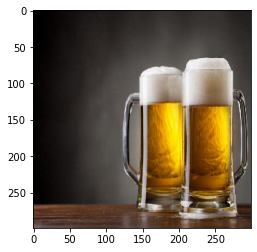

In [97]:
# Graficar Imagen modificada
adv /= 2
adv += 0.5
adv *= 255

plt.imshow(adv[0].astype(np.uint8))
plt.show()

In [0]:
# Guardar Imagen
im = Image.fromarray(adv[0].astype(np.uint8))
im.save("/content/Ataques Adversarios/hacket_beer.png")

# Listo!!! Ahora detecta la imagen como limon!!